<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

NOTA : este notebook se basa en A REGRESSION PROJECT IN PYTHON; PREDICT DIAMONDS PRICES BASED ON CUT, COLOR; CLARITY AND OTHER ATRIBUTES, creado por Roi Polanitzer.

https://medium.com/@polanitzer/a-regression-project-in-python-predict-diamonds-prices-based-on-cut-color-clarity-and-other-d856c0ba9a2c


# FASE 1 : COMPRENDER EL NEGOCIO

De Beers es la Compañia de diamantes más grande del mundo.
De Beers necesita saber el precio de mercado actualizado (en
dólares estaunidenses) de cualquier diamante que venda.

Se necesita crear un modelo que prediga, con un alto nivel de
precisión, el precio de mercado en dólares estaunidenses de un 
diamante al relacionar los precios de los diamantes vendidos
anteriormente. 


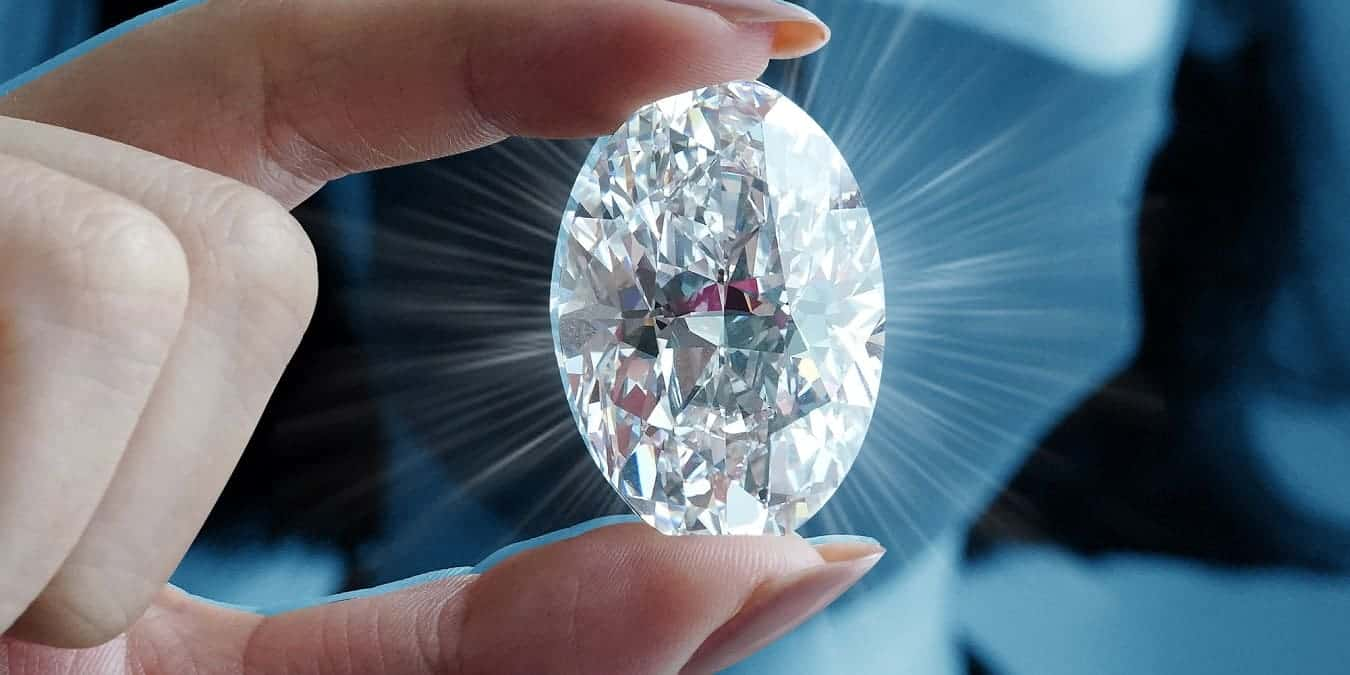

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb


In [ ]:
# **
# Leer el archivo Diamons.csv
#
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")

Saving Diamonds.csv to Diamonds.csv


# FASE 2 : COMPRENDER LO DATOS

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
# Usaremos un método resumen de estadísticas numéricas
df.describe().T

In [ ]:
# Las filas de conteo, media, mínimo y máximo se explican por sí mismas. 
# El std muestra la desviación estándar y las filas 25%, 50% y 75% muestran los percentiles correspondientes.

In [ ]:
df.columns

df2=df.drop(['Unnamed: 0'],axis=1)


In [ ]:
df2.columns

In [ ]:
corr_matrix = df2.corr()
corr_matrix["price"].sort_values(ascending=False)


In [ ]:
df2.query('x==0 or y==0 or z==0')

In [ ]:
sb.scatterplot(x=df2.carat , y=df2.price)

In [ ]:
len(df2.query('carat>3'))

In [ ]:
len(df2.query('carat>2'))

In [ ]:
sb.distplot(df2.price)

In [ ]:
sb.pairplot(df2)

# FASE 3 : PREPARAR LOS DATOS

In [ ]:
# Remover outliers
df2.query('z>10 or y>10')

In [ ]:
df2.query('z>10 or y>10').index

In [ ]:
df2.drop(df2.query('z>10 or y>10').index, inplace=True) 

In [ ]:
df2.query('x==0 or y==0 or z==0')

In [ ]:
df2.query('x==0 or y==0 or z==0').index

In [ ]:
df2.drop(df2.query("x==0 or y==0 or z==0").index, inplace=True)
sb.pairplot(df2)

In [ ]:
df2.head()

In [ ]:
df2["vol"] = df.x * df.y * df.z
df2.head()


In [ ]:
df2.drop(["x","y","z"], axis=1, inplace=True)
df2.head()


In [ ]:
# Creación de variables Dummy
df2.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df2.cut.replace({"Ideal":5, "Premium":4, "Good":2, "Very Good":3, "Fair":1}, inplace=True)
df2.head()

In [ ]:
df2.color.unique()

In [ ]:
df2.color.replace({"E":2, "I":6, "J":7, "H":5, "F":3, "G":4, "D":1}, inplace=True)
df2.head()

In [ ]:
df2.clarity.unique()

In [ ]:
df2.clarity.replace({"SI2":1, "SI1":2, "VS1":3, "VS2":4, "VVS2":5, "VVS1":6, "I1":7, "IF":8}, inplace=True)
df2.head()

In [ ]:
# Separamos en Train y Test
X = df2.drop(["price"], axis=1)
X.head()

In [ ]:
y = df2["price"]
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# FASE 4: MODELAMIENTO

Atención : se usarán conceptos aún no vistos

In [ ]:
# Se usara una Regresión Lineal, uno de los modelos más comunes.
#
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

In [ ]:
# La R al cuadrado del conjunto de entrenamiento es casi igual a la R al cuadrado del conjunto de prueba. 
# Esto es un indicativo de que nuestro modelo de regresión lineal no se está sobreajustando y, por lo tanto, 
# se está generalizando bien a los datos nuevos.
# Además, en nuestro modelo de regresión lineal, el 88,54 % de la variabilidad en los precios de los diamantes 
# puede explicarse utilizando las 7 características que elegimos
# (es decir, quilate, corte, color, claridad, tabla, profundidad y volumen). Esto es muy bueno.

In [ ]:
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")


In [ ]:
# Usaremos otro modelo, un árbol de decisión para regresión
#
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

In [ ]:
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(tree.score(X_test, y_test)))

In [ ]:
# La R cuadrada en el conjunto de entrenamiento es un poco más alta que la R cuadrada en el conjunto de prueba, 
# pero eso no significa que nuestro modelo de regresor del árbol de decisión esté sobreajustado. 
# Por el contrario, nuestro modelo de regresor de árbol de decisión se está generalizando bien a nuevos datos.
# Además, en nuestro modelo de regresor de árbol de decisiones, el 96,73 % de la variabilidad en los precios
# de los diamantes se puede explicar utilizando las 7 características que elegimos
# (es decir, quilate, corte, color, claridad, tabla, profundidad y volumen). Esto es excelente.

In [ ]:
y_pred1 = tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred1, color="red")


In [ ]:
# Aplicaremos otro modelo: un bosque aleatorio de árboles de decisión
#
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.72%
R squared of the Random Forest Regressor on test set: 98.14%


In [ ]:
# La R cuadrada en el conjunto de entrenamiento es un poco más alta que la R cuadrada en el conjunto de prueba, 
# pero eso no significa que nuestro modelo de regresor de bosque aleatorio esté sobreajustado. 
# Por el contrario, nuestro modelo de regresor de bosque aleatorio se está generalizando bien a nuevos datos.
# Además, en nuestro modelo de regresor de bosque aleatorio, el 98,15 % de la variabilidad en los precios 
# de los diamantes puede explicarse utilizando las 7 características que elegimos 
# (es decir, quilate, corte, color, claridad, tabla, profundidad y volumen). Esto es excelente.

In [ ]:
y_pred2 = rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred2, color="green")


# FASE 5 : EVALUACION DE MODELOS

Atención: hay conceptos aún no vistos

In [ ]:
# Evaluando el Modelo de Regresión Lineal
#
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred1)))

In [ ]:
# Nuestro modelo de regresión lineal pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± $869.38 del precio real.

In [ ]:
# Las siguientes líneas muestran un error, pues dan un valor negativo!!!!
#
from sklearn.metrics import mean_squared_log_error
print("Mean Squared Log Error of the Linear Regression on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred)))

***Este modelo en términos de producto es un mal producto porque no tiene sentido un precio negativo.***

In [ ]:
# Evaluando el Modelo de Árbol de Decisión de regresión
#
d = {"true": y_test, "predicted": y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt["diff"] = df_dt["predicted"]-df_dt["true"]
df_dt


In [ ]:
print("Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred1)))

In [ ]:
# Nuestro modelo de árbol de decisiones para regresión pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± $ 354.01 del precio real.

In [ ]:
print("Mean Squared Log Error of the Decision Tree Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred1)))

In [ ]:
# Nuestro modelo de regresor de árbol de decisión pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± 2.07% del precio real.

In [ ]:
# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"true": y_test, "predicted": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf


In [ ]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred2)))

In [ ]:
# Nuestro modelo de bosque aleatorio pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± $ 277 del precio real.

In [ ]:
print("Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred2)))

In [ ]:
# Nuestro modelo  de bosque aleatorio fue capaz de predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± 1,25 % del precio real.

In [ ]:
#**
# Selección del Modelo : se puede eligir el modelo Bosque Aleatorio como el mejor modelo entre los tres, 
# en función de sus puntajes MAE y MSLE en la prueba
#
model = rf
model


# FASE 6: DEPLOYMENT

Entonces, nuestro modelo Random Forest es un modelo bastante bueno para predecir el precio de mercado de un diamante. Ahora, ¿cómo predecimos el precio de mercado de un nuevo diamante nuevo diamante?
Supongamos que hay un diamante nuevo que tiene: quilate=0,23, corte=5 (Ideal), color=2 (E), claridad=1 (SI2), profundidad=61,5, tabla=55, volumen=38,20 (x=3,95, y=3,98 y z=2,43). **bold text**

In [ ]:
new_diamond = [0.23, 5, 2, 1, 61.5, 55, 38.20]
new_diamond


In [ ]:
# Podemos tomar estos nuevos datos y usarlos para predecir el precio de mercado del nuevo diamante.
#
prediction = model.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

**Guardar el modelo finalizado en formato pickle nos ahorra mucho tiempo ya que no tenemos que entrenar nuestro modelo cada vez que ejecutamos la aplicación. Una vez que guardamos nuestro modelo como pickle, puede cargarlo más tarde mientras realiza la predicción.**

In [ ]:
import pickle

In [ ]:
# Primero, abramos un nuevo archivo para nuestro almacenar nuestro modelo y poder llamarlo
f1 = open('fw_model1', 'wb')

In [ ]:
# Así, salvamos en este archivo nuestro modelo de Bosque Aleatorio
pickle.dump(model , f1)

In [ ]:
# Y cerramos el archivo
f1.close()

En un nuevo notebook

In [ ]:
#import pickle
#f2 = open('fw_model1', 'rb')
#model = pickle.load(f2)
# ** Haga una nueva predicción para la transacción anterior
#model.predict([[0.23, 5, 2, 1, 61.5, 55, 38.20]])[0]
# ** Debería obtener $382.34
